# Clustering

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def showData(data1, data2, color, title):
    plt.scatter(data1, data2, c=color)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

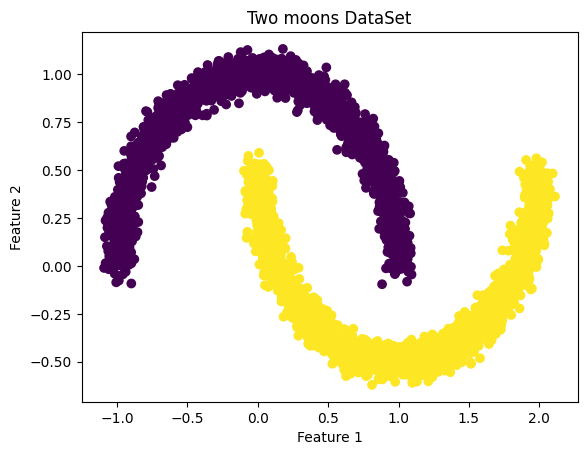

In [ ]:
# Generate the data
dataset1_X, dataset1_y = make_moons(n_samples=4000, noise=0.05, random_state=0)

showData(dataset1_X[:, 0], dataset1_X[:, 1], dataset1_y, 'Two moons DataSet')

In [ ]:
def data_generator():
  n = 4000
  t = np.linspace(0, 2*np.pi, n)
  r = np.linspace(0.5, 1, n)
  x1 = r * np.cos(t) + np.random.randn(n) * 0.033
  y1 = r * np.sin(t) + np.random.randn(n) * 0.033
  x2 = -r * np.cos(t) + np.random.randn(n) * 0.033
  y2 = -r * np.sin(t) + np.random.randn(n) * 0.033
  X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
  y = np.hstack((np.zeros(n), np.ones(n)))

  return X,y

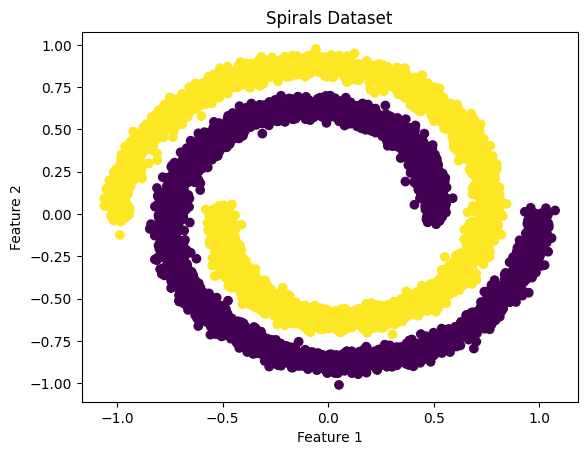

In [ ]:
dataset2_X, dataset2_y = data_generator()

showData(dataset2_X[:, 0], dataset2_X[:, 1], dataset2_y, 'Spirals Dataset')

In [ ]:
def getSample(dataset_x, dataset_y, title):
    N = len(dataset_x)
    ind_list = [i for i in range(N)]
    ind_list = np.random.choice(ind_list, 1000)
    sample  = dataset_x[ind_list, :]
    label = dataset_y[ind_list]

    showData(sample[:, 0], sample[:, 1], label, title)
    
    return sample, label

In [ ]:
def clusteringHierarchy(data) :
    y_predict = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(data)
    clf = NearestCentroid()
    clf.fit(data, y_predict)

    plt.scatter(data[:, 0], data[:, 1], c=y_predict)
    plt.scatter(clf.centroids_[1], clf.centroids_[0], c='red')
    plt.show()

    return y_predict, clf.centroids_

In [ ]:
def cluster_rep_points(cluster_center, cluster_points, number_of_representatives=4, alpha=0.2):
  rep_points = None
  temp_set = None
  for i in range(number_of_representatives):
    max_dist = 0
    for point in cluster_points:
      if i == 0:
        min_dist = math.dist(point, cluster_center)
      else:
        distances = []
        for q in temp_set:
          distances.append(math.dist(point, q))
        min_dist = min(distances)
      if min_dist >= max_dist:
        max_dist = min_dist
        max_point = point
    if temp_set is None:
      temp_set = [max_point]
    else:
      temp_set = np.vstack((temp_set, [max_point]))
  
  for point in temp_set:
    if rep_points is None:
      rep_points = point + alpha * (cluster_center - point)
    else:
      rep_points = np.vstack((rep_points, point + alpha * (cluster_center - point)))
  
  return temp_set, rep_points

## Dataset 1

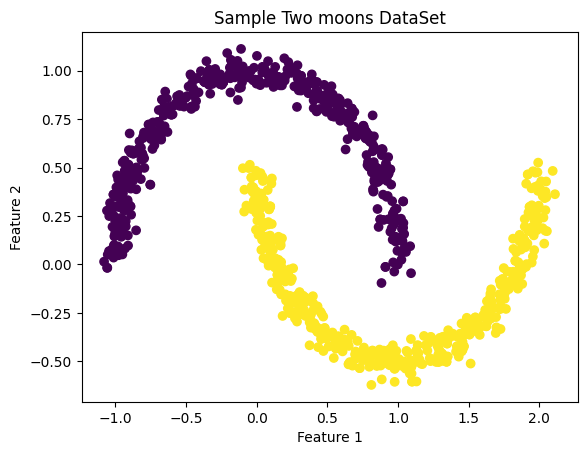

In [ ]:
d1_sample, d1_label = getSample(dataset1_X, dataset1_y, 'Sample Two moons DataSet')

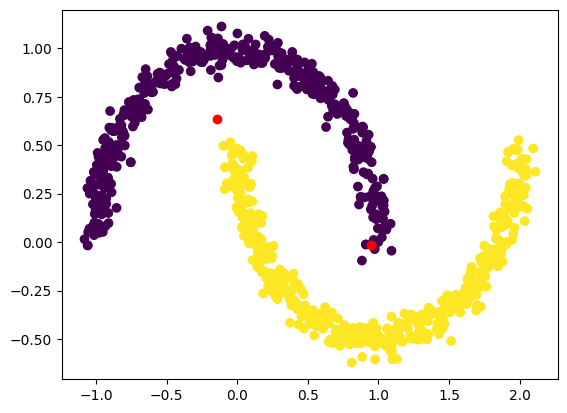

In [ ]:
d1_y_predict, d1_centers = clusteringHierarchy(d1_sample)

In [ ]:
d1_cluster0 = d1_sample[d1_y_predict == 0]
d1_cluster1 = d1_sample[d1_y_predict == 1]

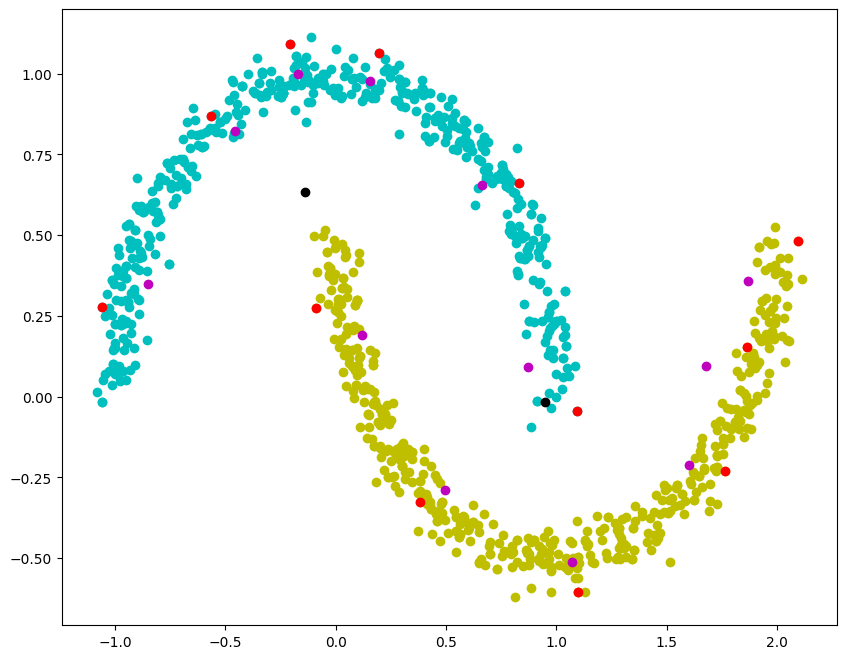

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(d1_cluster0[:, 0], d1_cluster0[:, 1], c='c')
plt.scatter(d1_cluster1[:, 0], d1_cluster1[:, 1], c='y')

re_sample_cluster0, rep_point_cluster0 = cluster_rep_points(d1_centers[0], d1_cluster0, 6, 0.2)
re_sample_cluster1, rep_point_cluster1 = cluster_rep_points(d1_centers[1], d1_cluster1, 6, 0.2)

plt.scatter(rep_point_cluster0[:, 0], rep_point_cluster0[:, 1], c='m')
plt.scatter(re_sample_cluster0[:, 0], re_sample_cluster0[:, 1], c='r')

plt.scatter(rep_point_cluster1[:, 0], rep_point_cluster1[:, 1], c='m')
plt.scatter(re_sample_cluster1[:, 0], re_sample_cluster1[:, 1], c='r')
plt.scatter(d1_centers[1], d1_centers[0], c='black')

plt.show()

In [ ]:
x3 = rep_point_cluster0.copy()
x3 = list(x3)
x3.extend(rep_point_cluster1)

x3_y = [0]*len(rep_point_cluster0)
x3_y.extend([1]*len(rep_point_cluster1))

In [ ]:
dataset1_y_predict = dataset1_y.copy()
for i in range(len(dataset1_X)):
    min_distance = math.dist(dataset1_X[i], x3[0])
    y = 0
    for j in range(len(x3)):
        if math.dist(dataset1_X[i], x3[j]) < min_distance:
            min_distance = math.dist(dataset1_X[i], x3[j])
            y = x3_y[j]
    
    dataset1_y_predict[i] = y

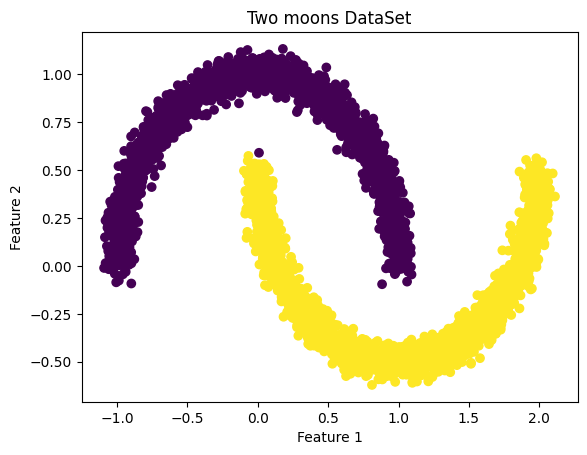

In [ ]:
showData(dataset1_X[:, 0], dataset1_X[:, 1], dataset1_y_predict, 'Two moons DataSet')

## Dataset 2

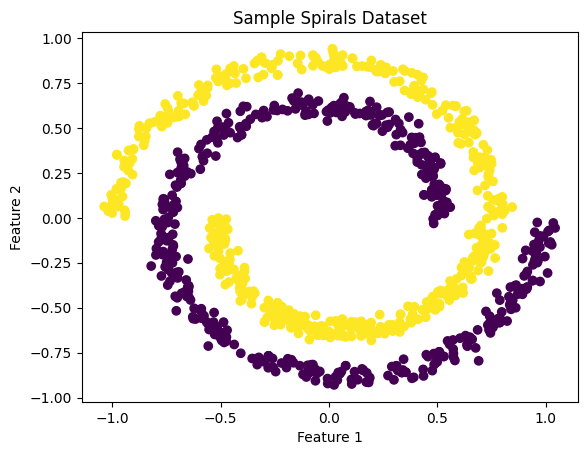

In [ ]:
d2_sample, d2_label = getSample(dataset2_X, dataset2_y, 'Sample Spirals Dataset')

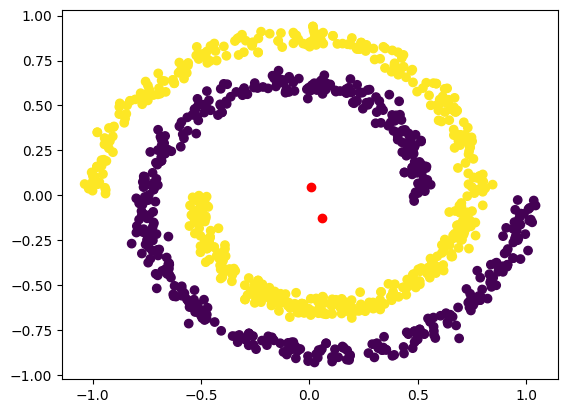

In [ ]:
d2_y_predict, d2_centers = clusteringHierarchy(d2_sample)

In [ ]:
d2_cluster0 = d2_sample[d2_y_predict == 0]
d2_cluster1 = d2_sample[d2_y_predict == 1]

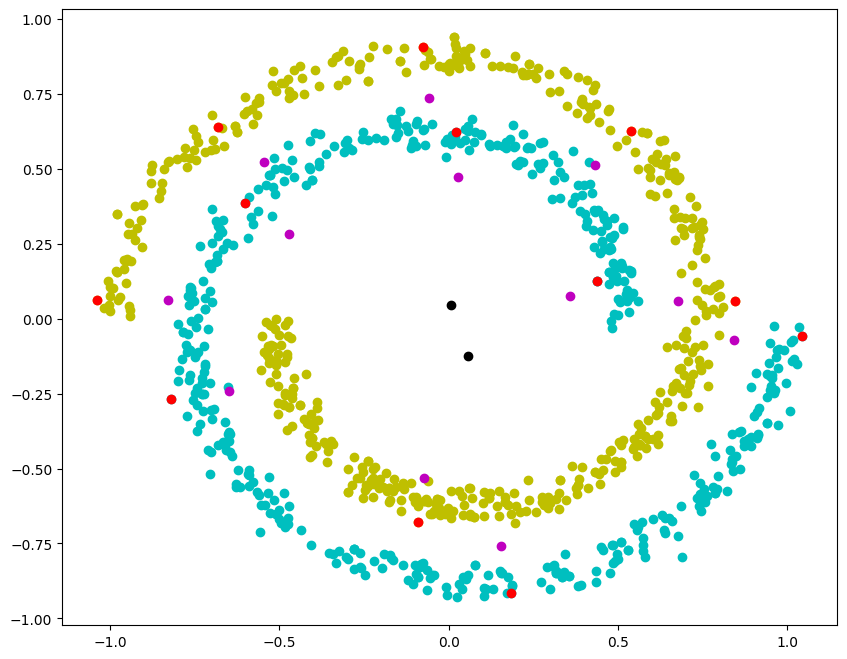

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(d2_cluster0[:, 0], d2_cluster0[:, 1], c='c')
plt.scatter(d2_cluster1[:, 0], d2_cluster1[:, 1], c='y')

re_sample_cluster0, rep_point_cluster0 = cluster_rep_points(d2_centers[0], d2_cluster0, 6, 0.2)
re_sample_cluster1, rep_point_cluster1 = cluster_rep_points(d2_centers[1], d2_cluster1, 6, 0.2)

plt.scatter(rep_point_cluster0[:, 0], rep_point_cluster0[:, 1], c='m')
plt.scatter(re_sample_cluster0[:, 0], re_sample_cluster0[:, 1], c='r')

plt.scatter(rep_point_cluster1[:, 0], rep_point_cluster1[:, 1], c='m')
plt.scatter(re_sample_cluster1[:, 0], re_sample_cluster1[:, 1], c='r')
plt.scatter(d2_centers[1], d2_centers[0], c='black')

plt.show()

In [ ]:
x3 = rep_point_cluster0.copy()
x3 = list(x3)
x3.extend(rep_point_cluster1)

x3_y = [0]*len(rep_point_cluster0)
x3_y.extend([1]*len(rep_point_cluster1))

In [ ]:
dataset2_y_predict = dataset2_y.copy()
for i in range(len(dataset2_X)):
    min_distance = math.dist(dataset2_X[i], x3[0])
    y = 0
    for j in range(len(x3)):
        if math.dist(dataset2_X[i], x3[j]) < min_distance:
            min_distance = math.dist(dataset2_X[i], x3[j])
            y = x3_y[j]
    
    dataset2_y_predict[i] = y

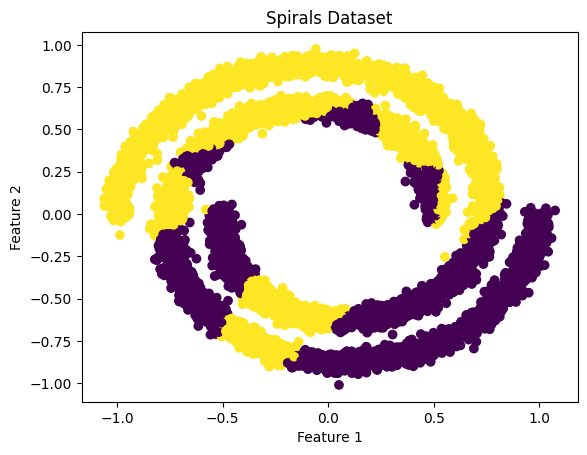

In [ ]:
showData(dataset2_X[:, 0], dataset2_X[:, 1], dataset2_y_predict, 'Spirals Dataset')